## Plot memory and inducing variables

Plot the inducing variables and memory of a trained model.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
main_online_dir = "../split_mnist_runs/online_memory/14-37-24/"

## Inducing variable

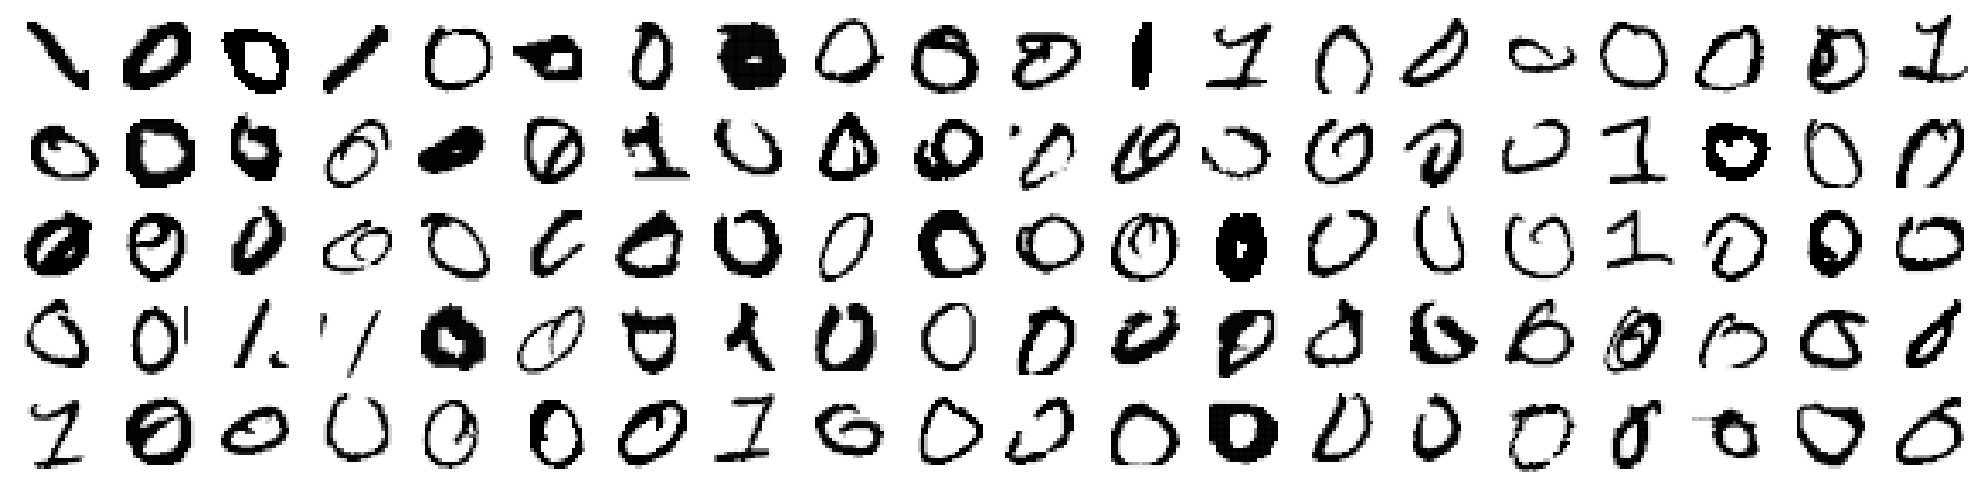

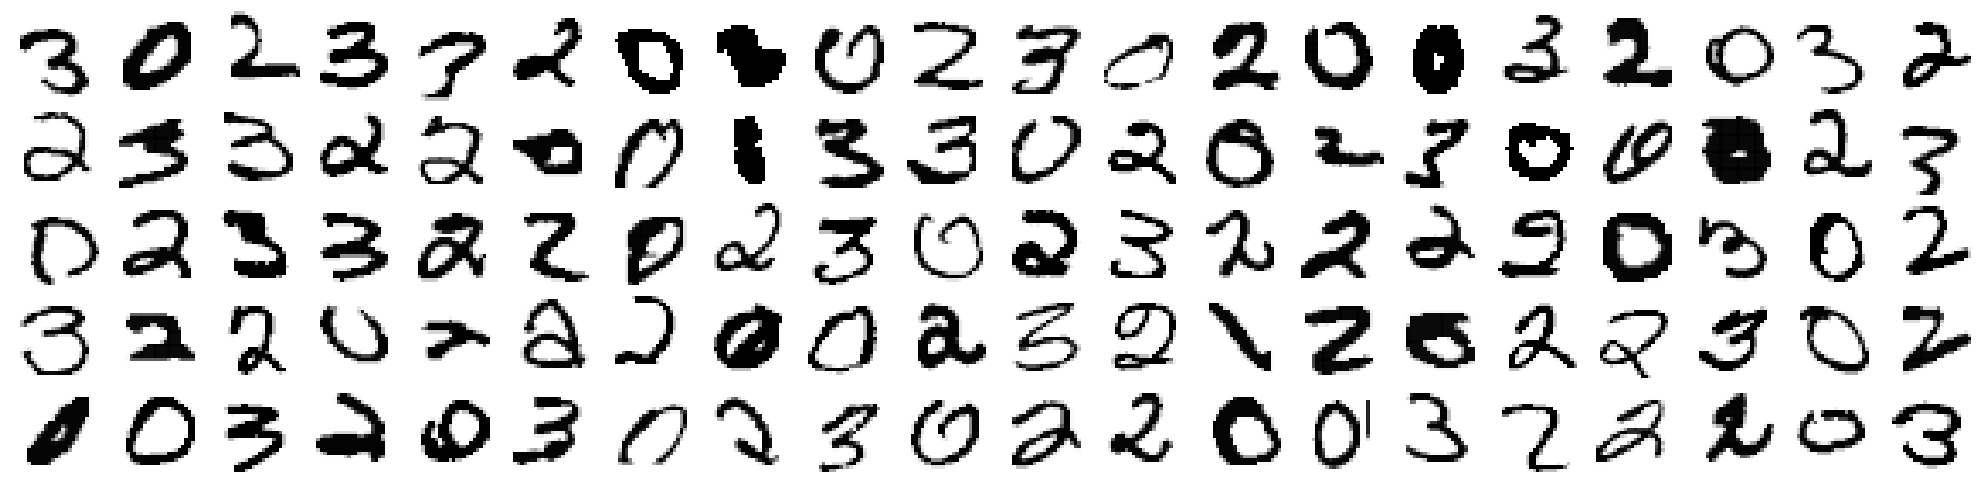

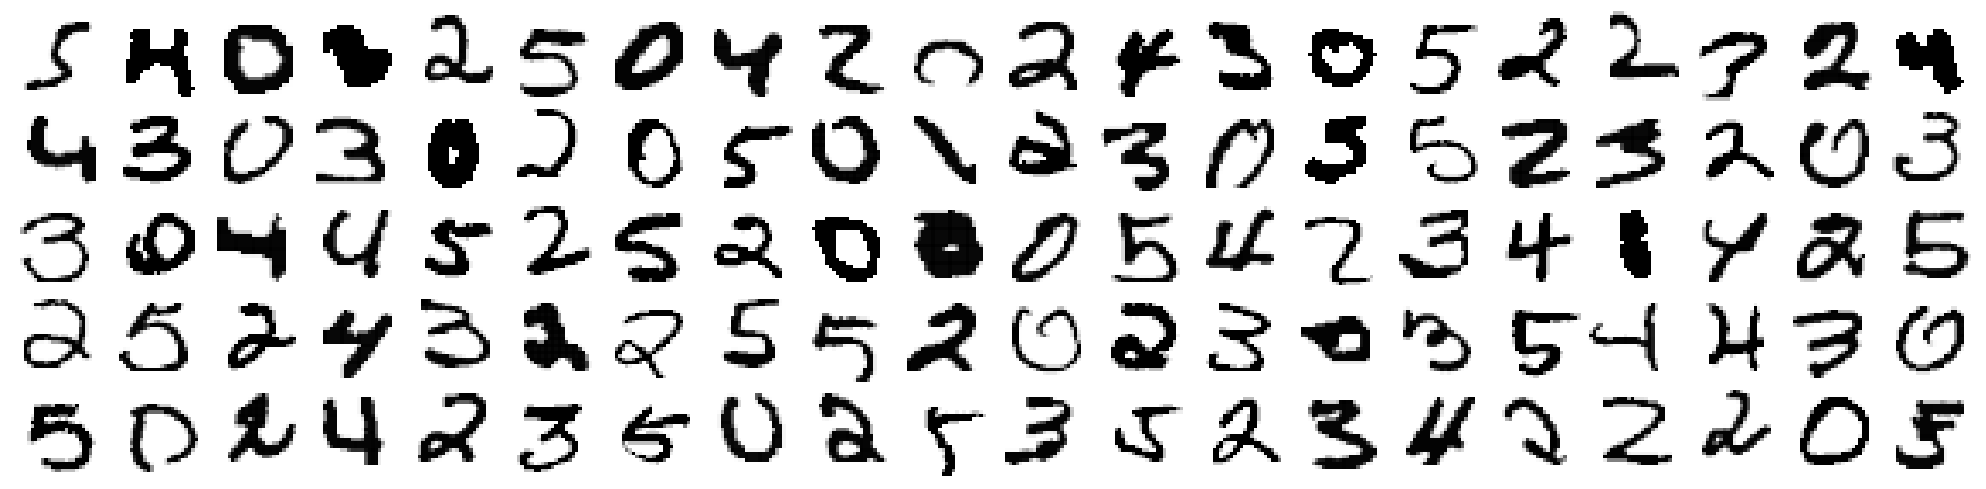

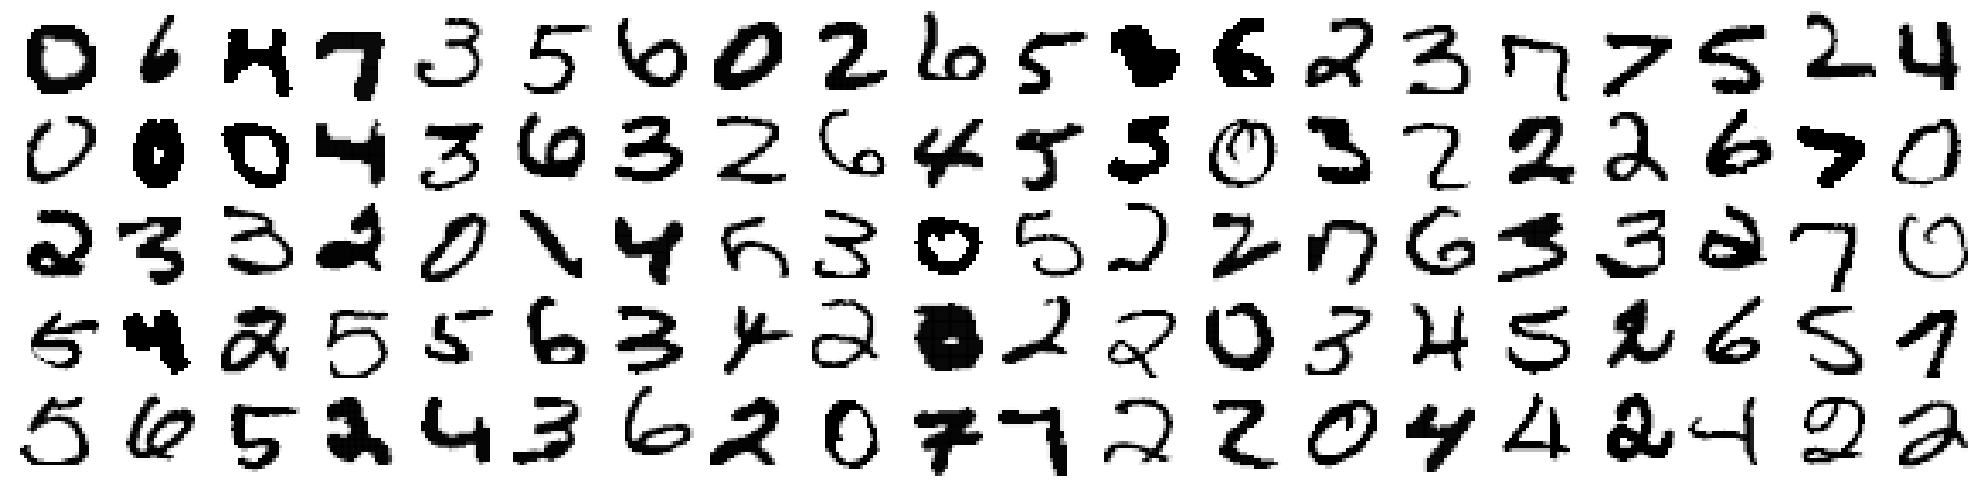

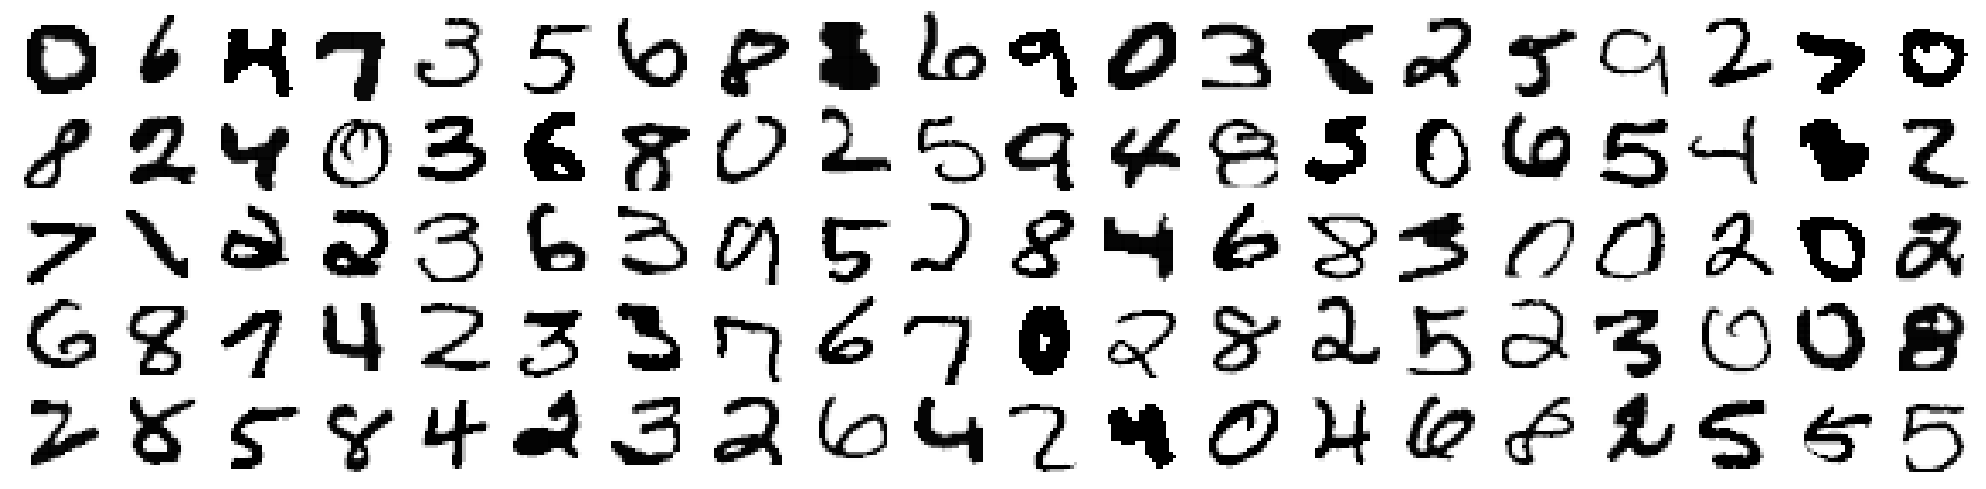

In [3]:
for model_idx in range(5):    
    filename = f"memory_and_Z_{model_idx}.npz"
    inducing_memory_path = os.path.join(main_online_dir, filename)
    inducing_memory_data = np.load(inducing_memory_path)
    inducing_pnts = inducing_memory_data["Z"]
    
    total_rows = 5
    total_cols = 20
    fig, axs = plt.subplots(total_rows, total_cols, figsize=(20, 5))
    row = 0
    col = 0
    idx_all = np.linspace(0, 99, 100).astype(np.int32)
    for i in range(total_cols * total_rows):
        idx = idx_all[i]
        img = inducing_pnts[idx].reshape((28, 28, 1))
        
        # Convert gray scale into RGBA
        inv_img = 1. - img
        alpha = img
        img = np.concatenate([inv_img, inv_img, inv_img, alpha], axis=-1)
        
        axs[row][col].imshow(img, vmin=0.0, vmax=1.0)
        axs[row][col].set_axis_off()
        
        col += 1
        if col > (total_cols-1):
            col = 0
            row += 1
    
    fig.tight_layout(h_pad=0.0, w_pad=0.0)
    plt.show()
        

## Memory

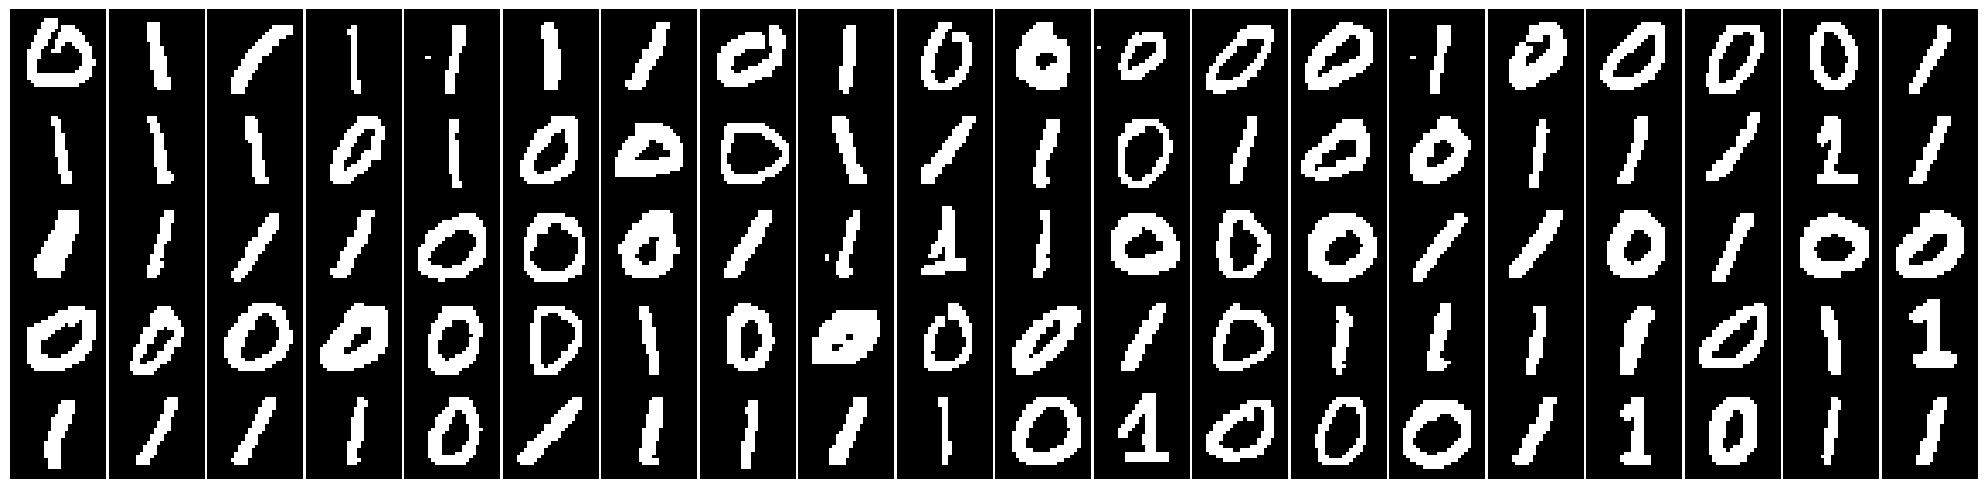

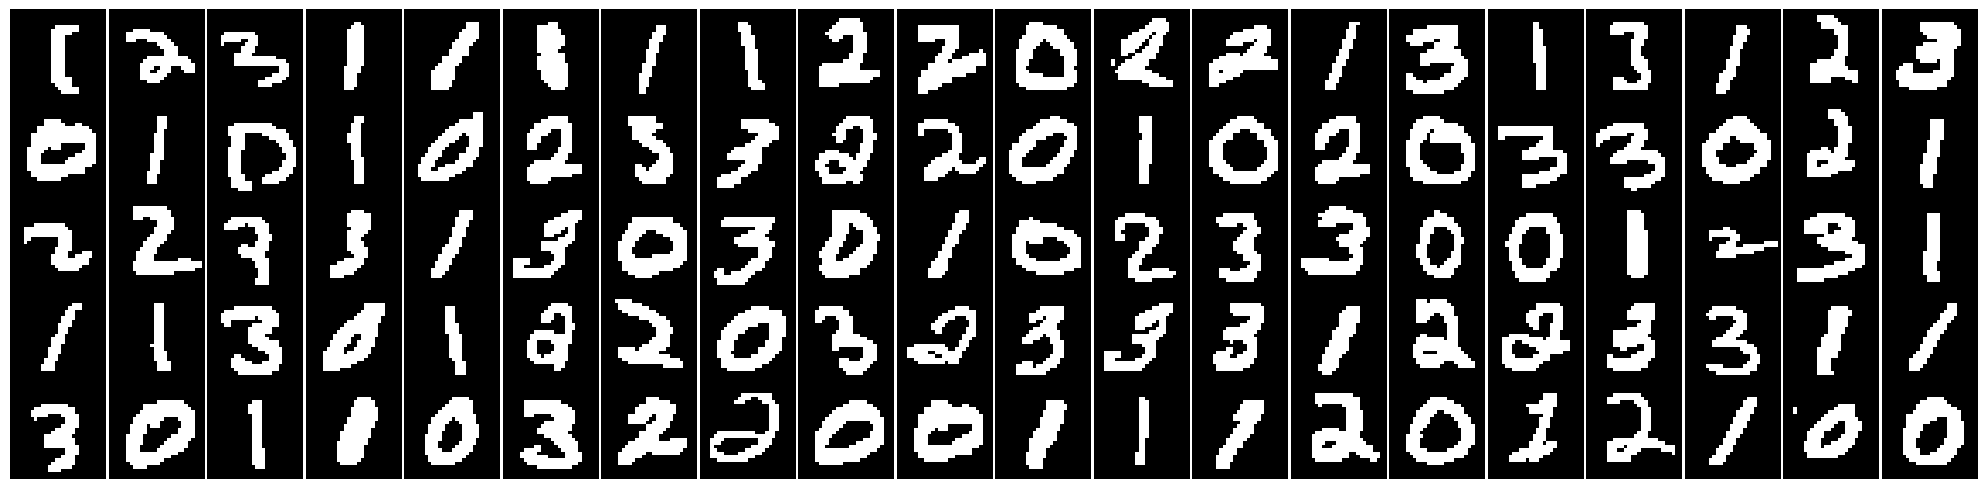

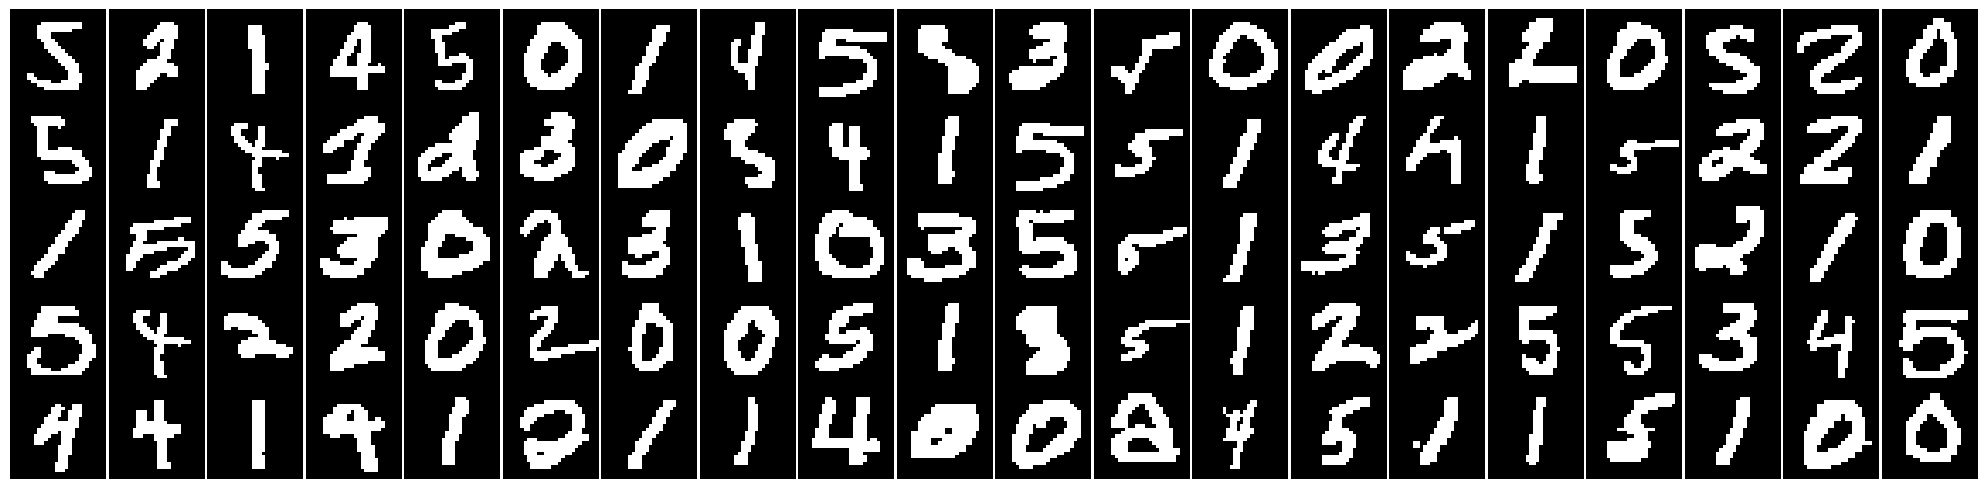

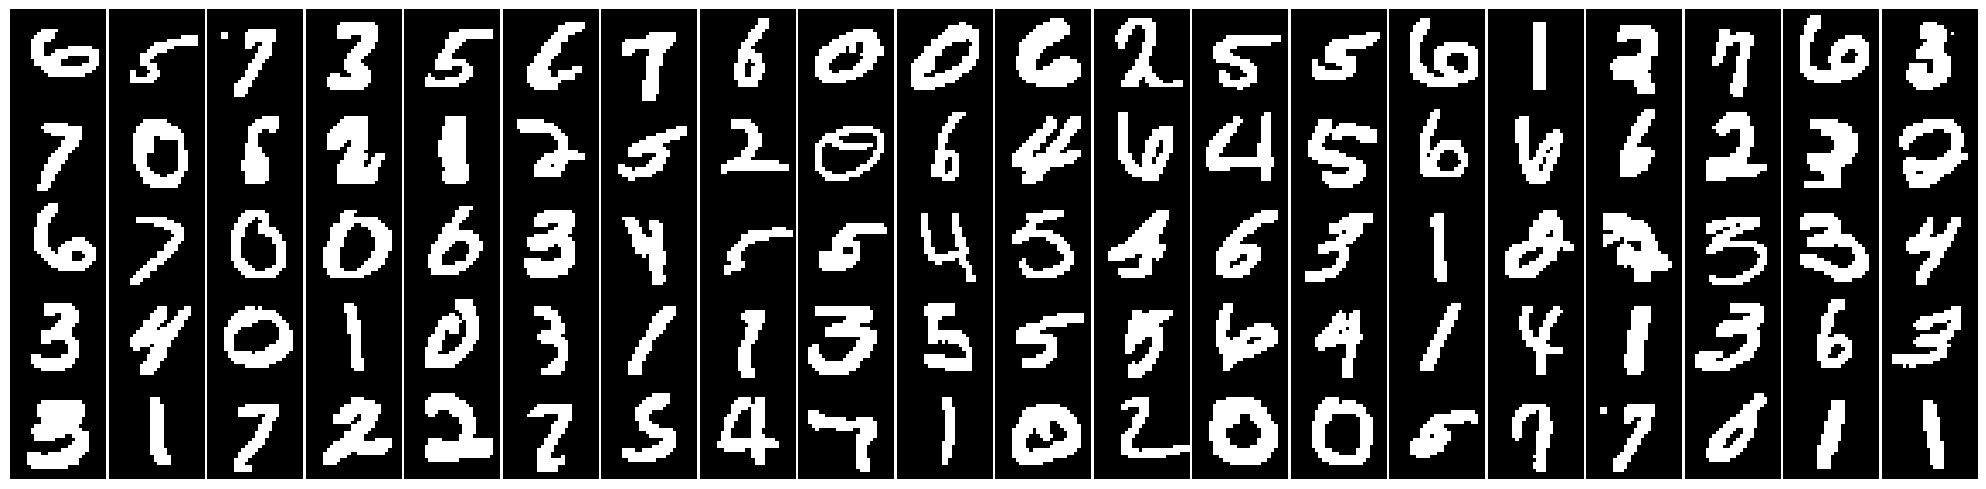

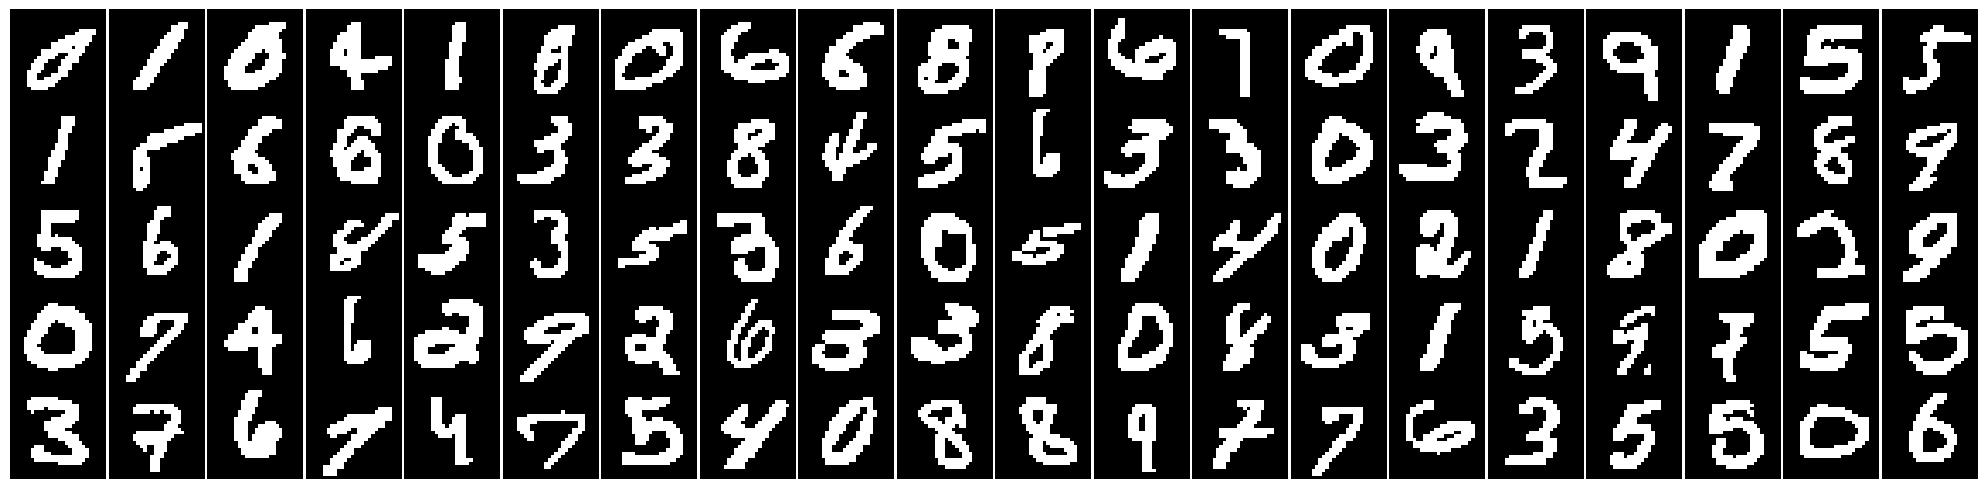

In [4]:
for model_idx in range(5):
    
    filename = f"memory_and_Z_{model_idx}.npz"
    inducing_memory_path = os.path.join(main_online_dir, filename)
    inducing_memory_data = np.load(inducing_memory_path)

    memory = inducing_memory_data["mem"]
    
    total_rows = 5
    total_cols = 20
    fig, axs = plt.subplots(total_rows, total_cols, figsize=(20, 5))
    row = 0
    col = 0
    
    random_idx = np.random.randint(0, memory.shape[0], total_cols*total_rows)
    for i in range(total_cols * total_rows):
        idx = random_idx[i]
        img = memory[idx].reshape((28, 28, 1))
        
        img[img>0]=1
        alpha = img
        img_rgb = np.concatenate([img, img, img], axis=-1)
        img_rgb = img_rgb * 255
        img_rgb = img_rgb.astype(np.int32)
        img = np.concatenate([img_rgb, alpha], axis=-1)
        
        axs[row][col].imshow(img_rgb)
        axs[row][col].set_axis_off()
        
        col += 1
        if col > (total_cols-1):
            col = 0
            row += 1
            
    fig.tight_layout(h_pad=0.0, w_pad=0.0)
    plt.show()
        